In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def parse_files(directory_path):
    result_list = []
    for root, _, files in os.walk(directory_path):
        for file in files:
            parsed_name = set(re.split(r'_', file))
            result_list.append((file, parsed_name))
    return result_list


In [3]:
directory_path = './experiments_results/iterations/'
full_path = os.path.abspath(directory_path)
print(full_path)
parsed_files_list = parse_files(full_path)

/home/igoreshka/Desktop/ЛАБКА/MMO_transportnet/mmo_tm/experiments_results/iterations


In [4]:
df = pd.DataFrame(parsed_files_list, columns=['name','parsed'])
df['parsed'].head()

0    {100iters, conjugate, frank, 18:00.csv, gap, B...
1    {Winnipeg, 2023-10-16, duality, frank, gap, 14...
2    {2023-10-26, frank, 30iters, gap, 15:12.csv, d...
3    {conjugate, 15iters, frank, gap, 16:41.csv, Be...
4    {fukushima, 2023-11-20, SiouxFalls, 2000iters,...
Name: parsed, dtype: object

In [5]:
def searcher( keys , x) :
    for key in keys :
        if key not in x :
            return False
    return True

def items_by_keys( df , keys) :
    filtered_df = df[df['parsed'].apply( lambda x : searcher(keys , x) )]
    results = filtered_df['name'].values
    return results
def copy_and_transform_files( files, directory_path , output_directory ):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        print(f"Папка {output_directory} успешно создана.")
    else:
        print(f"Папка {output_directory} уже существует.")
    for file_name in files :
        source_path = os.path.join(directory_path, file_name)
        # print(source_path)
        destination_path = os.path.join(output_directory, file_name)
        iters = pd.read_csv(source_path)
        values = iters.values.T
        values[:, [0, 1]] = values[:, [1, 0]]
        frame = pd.DataFrame(values , columns=['x','y'])
        # sampled_frame = frame.iloc[::int(len(frame)/100)]
        # sampled_frame.to_csv(destination_path, index=False)
        frame.to_csv(destination_path, index=False)
        
        # shutil.copy(source_path, destination_path)
        # print(f"Файл {file_name} скопирован в {output_directory}.")
def text_TEX_plots(results , name_city) :
    for filename in results :
        print('\\addplot [no marks,green] table [col sep=comma]{plots/'+name_city +'/'+ filename + '};\\addlegendentry{}')

In [9]:
keys = ['relative','gap' , '1000iters' , '2023-10-19' ,'Anaheim']
results = items_by_keys(df , keys)
print(results)

['relative_gap_frank_wolfe linesearch_Anaheim_1000iters_datetime_2023-10-19_16:48.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Anaheim_1000iters_datetime_2023-10-19_16:48.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Anaheim_1000iters_datetime_2023-10-19_16:48.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Anaheim_1000iters_datetime_2023-10-19_16:48.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Anaheim_1000iters_datetime_2023-10-19_16:48.csv'
 'relative_gap_frank_wolfe_Anaheim_1000iters_datetime_2023-10-19_16:48.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Anaheim_1000iters_datetime_2023-10-19_16:48.csv']


In [11]:
text_TEX_plots(results)

\addplot [no marks,green] table [col sep=comma]{plots/relative_gap_frank_wolfe linesearch_Anaheim_1000iters_datetime_2023-10-19_16:48.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/relative_gap_conjugate_frank_wolfe linesearch_Anaheim_1000iters_datetime_2023-10-19_16:48.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/relative_gap_N_conjugate_frank_wolfe linesearch N =3_Anaheim_1000iters_datetime_2023-10-19_16:48.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/relative_gap_N_conjugate_frank_wolfe linesearch N =4_Anaheim_1000iters_datetime_2023-10-19_16:48.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Anaheim_1000iters_datetime_2023-10-19_16:48.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/relative_gap_frank_wolfe_Anaheim_1000iters_datetime_2023-10-19_16:48.csv};\addlegendentry{}


формат для overleaf : DataFrame(columns['x','y']).to_csv()

In [15]:

name_city = 'Anaheim'
keys = ['relative','gap' , '1000iters' , '2023-10-19' ,'Anaheim']

results = items_by_keys(df , keys)

text_TEX_plots(results,name_city)
print(results)

copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

In [29]:
name_city = 'SiouxFalls'
keys = ['relative','gap'  , '2023-10-19','1000iters',name_city]

results = items_by_keys(df , keys)
print(results)

['relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv'
 'relative_gap_frank_wolfe linesearch_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv'
 'relative_gap_frank_wolfe_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv']


In [32]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/SiouxFalls/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/SiouxFalls/relative_gap_frank_wolfe linesearch_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/SiouxFalls/relative_gap_frank_wolfe_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/SiouxFalls/relative_gap_conjugate_frank_wolfe linesearch_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/SiouxFalls/relative_gap_Bi_conjugate_frank_wolfe linesearch_SiouxFalls_1000iters_datetime_2023-10-19_16:43.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/SiouxFalls/relative_gap_N_conjugate_frank_wolfe linese

In [36]:
name_city = 'Berlin-Tiergarten'
keys = ['relative','gap'  , '2023-10-19', '2000iters',name_city]

results = items_by_keys(df , keys)
print(results)

['relative_gap_conjugate_frank_wolfe linesearch_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv'
 'relative_gap_frank_wolfe_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv']


In [37]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Tiergarten/relative_gap_conjugate_frank_wolfe linesearch_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Tiergarten/relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Tiergarten/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Tiergarten/relative_gap_N_conjugate_frank_wolfe linesearch N =4_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Tiergarten/relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Tiergarten_2000iters_datetime_2023-10-19_16:57.csv};\addlegende

In [43]:

name_city = 'Terrassa-Asymmetric'
keys = ['relative','gap'  , '2023-10-19', name_city]

results = items_by_keys(df , keys)
print(results)

['relative_gap_conjugate_frank_wolfe linesearch_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv'
 'relative_gap_frank_wolfe_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv']


In [44]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/Terrassa-Asymmetric/relative_gap_conjugate_frank_wolfe linesearch_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Terrassa-Asymmetric/relative_gap_frank_wolfe_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Terrassa-Asymmetric/relative_gap_Bi_conjugate_frank_wolfe linesearch_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Terrassa-Asymmetric/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Terrassa-Asymmetric/relative_gap_N_conjugate_frank_wolfe linesearch N =3_Terrassa-Asymmetric_2000iters_datetime_2023-10-19_17:09.csv};\addlegendentry{}
\

In [48]:

name_city = 'Chicago-Sketch'
keys = ['relative','gap'  , '2023-10-26', '1000iters',name_city]

results = items_by_keys(df , keys)
print(results)

['relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv'
 'relative_gap_frank_wolfe_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv']


In [49]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/Chicago-Sketch/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Chicago-Sketch/relative_gap_frank_wolfe_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Chicago-Sketch/relative_gap_N_conjugate_frank_wolfe linesearch N =3_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Chicago-Sketch/relative_gap_N_conjugate_frank_wolfe linesearch N =4_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Chicago-Sketch/relative_gap_conjugate_frank_wolfe linesearch_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]

In [50]:
name_city = 'Berlin-Mitte-Center'
keys = ['relative','gap'  , '2023-10-26', '2000iters',name_city]

results = items_by_keys(df , keys)
print(results)

['relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv'
 'relative_gap_frank_wolfe_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv']


In [51]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Mitte-Center/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Mitte-Center/relative_gap_frank_wolfe_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Mitte-Center/relative_gap_conjugate_frank_wolfe linesearch_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Mitte-Center/relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Mitte-Center/relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Mitte-Center_2000iters_datetime_2023-10-26_14:56.csv};\addlegendentry{}
\

In [58]:
name_city = 'Berlin-Center'
keys = ['relative','gap'  , '2023-10-26',name_city]

results = items_by_keys(df , keys)
print(results)

['relative_gap_frank_wolfe_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv']


In [59]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Center/relative_gap_frank_wolfe_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Center/relative_gap_conjugate_frank_wolfe linesearch_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Center/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Center/relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Center/relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Center_30iters_datetime_2023-10-26_15:12.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Center/rel

In [63]:
name_city = 'Berlin-Friedrichshain'
keys = ['relative','gap'  , '2023-10-26' , '5000iters',name_city]

results = items_by_keys(df , keys)
print(results)

['relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv'
 'relative_gap_frank_wolfe_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv']


In [64]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Friedrichshain/relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Friedrichshain/relative_gap_N_conjugate_frank_wolfe linesearch N =4_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Friedrichshain/relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Friedrichshain/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Friedrichshain_5000iters_datetime_2023-10-26_15:25.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Friedrichshain/relative_gap_conjugate_frank_wolfe linesearch_Berlin-Friedrichshain_5000iters_da

In [70]:
name_city = 'Barcelona'
keys = ['relative','gap'  , '2023-10-26' , '1000iters',name_city]

results = items_by_keys(df , keys)
print(results)

['relative_gap_frank_wolfe_Barcelona_1000iters_datetime_2023-10-26_15:35.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Barcelona_1000iters_datetime_2023-10-26_15:35.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Barcelona_1000iters_datetime_2023-10-26_15:35.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Barcelona_1000iters_datetime_2023-10-26_15:35.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Barcelona_1000iters_datetime_2023-10-26_15:35.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Barcelona_1000iters_datetime_2023-10-26_15:35.csv']


In [71]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/Barcelona/relative_gap_frank_wolfe_Barcelona_1000iters_datetime_2023-10-26_15:35.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Barcelona/relative_gap_conjugate_frank_wolfe linesearch_Barcelona_1000iters_datetime_2023-10-26_15:35.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Barcelona/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Barcelona_1000iters_datetime_2023-10-26_15:35.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Barcelona/relative_gap_Bi_conjugate_frank_wolfe linesearch_Barcelona_1000iters_datetime_2023-10-26_15:35.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Barcelona/relative_gap_N_conjugate_frank_wolfe linesearch N =4_Barcelona_1000iters_datetime_2023-10-26_15:35.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Barcelona/relative_gap_N_conjugate_frank_wolfe 

In [77]:
name_city = 'Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center'
keys = ['relative','gap'  ,'3000iters',name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_conjugate_frank_wolfe linesearch_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10-26_16:08.csv'
 'relative_gap_frank_wolfe_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10-26_16:08.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10-26_16:08.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10-26_16:08.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10-26_16:08.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10-26_16:08.csv']


In [78]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center/relative_gap_conjugate_frank_wolfe linesearch_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10-26_16:08.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center/relative_gap_frank_wolfe_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10-26_16:08.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center/relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10-26_16:08.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center_3000iters_datetime_2023-10

In [82]:
name_city = 'Philadelphia'
keys = ['relative','gap' ,'15iters' ,name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Philadelphia_15iters_datetime_2023-10-23_16:52.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Philadelphia_15iters_datetime_2023-10-23_16:52.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Philadelphia_15iters_datetime_2023-10-23_16:52.csv'
 'relative_gap_frank_wolfe_Philadelphia_15iters_datetime_2023-10-23_16:52.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Philadelphia_15iters_datetime_2023-10-23_16:52.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Philadelphia_15iters_datetime_2023-10-23_16:52.csv']


In [83]:
text_TEX_plots(results,name_city)
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/'+name_city+'/')

\addplot [no marks,green] table [col sep=comma]{plots/Philadelphia/relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Philadelphia_15iters_datetime_2023-10-23_16:52.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Philadelphia/relative_gap_conjugate_frank_wolfe linesearch_Philadelphia_15iters_datetime_2023-10-23_16:52.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Philadelphia/relative_gap_N_conjugate_frank_wolfe linesearch N =3_Philadelphia_15iters_datetime_2023-10-23_16:52.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Philadelphia/relative_gap_frank_wolfe_Philadelphia_15iters_datetime_2023-10-23_16:52.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Philadelphia/relative_gap_Bi_conjugate_frank_wolfe linesearch_Philadelphia_15iters_datetime_2023-10-23_16:52.csv};\addlegendentry{}
\addplot [no marks,green] table [col sep=comma]{plots/Philadelphia/relative_gap_N

FWF with FWF weighted

In [43]:
name_city = 'SiouxFalls'
keys = ['relative','gap' ,'2000iters' ,name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_fukushima_frank_wolfe linesearch N =5_SiouxFalls_2000iters_datetime_2023-11-20_14:06.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_SiouxFalls_2000iters_datetime_2023-11-20_14:06.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.4_SiouxFalls_2000iters_datetime_2023-11-20_14:06.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_SiouxFalls_2000iters_datetime_2023-11-20_14:06.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =4_SiouxFalls_2000iters_datetime_2023-11-20_14:06.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =6_SiouxFalls_2000iters_datetime_2023-11-20_14:06.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.1_SiouxFalls_2000iters_datetime_2023-11-20_14:06.csv']


In [44]:
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/WFW_WFW_weighted/'+name_city+'/')

Папка ./experiments_results/for_paper/WFW_WFW_weighted/SiouxFalls/ успешно создана.


In [45]:
name_city = 'Anaheim'
keys = ['relative','gap' ,'2000iters' ,name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Anaheim_2000iters_datetime_2023-11-20_14:20.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Anaheim_2000iters_datetime_2023-11-20_14:20.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =4_Anaheim_2000iters_datetime_2023-11-20_14:20.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.4_Anaheim_2000iters_datetime_2023-11-20_14:20.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.1_Anaheim_2000iters_datetime_2023-11-20_14:20.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =5_Anaheim_2000iters_datetime_2023-11-20_14:20.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =6_Anaheim_2000iters_datetime_2023-11-20_14:20.csv']


In [46]:
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/WFW_WFW_weighted/'+name_city+'/')

Папка ./experiments_results/for_paper/WFW_WFW_weighted/Anaheim/ успешно создана.


In [47]:
name_city = 'Berlin-Friedrichshain'
keys = ['relative','gap' ,'2000iters' ,name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_fukushima_frank_wolfe linesearch N =6_Berlin-Friedrichshain_2000iters_datetime_2023-11-20_14:25.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Berlin-Friedrichshain_2000iters_datetime_2023-11-20_14:25.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =4_Berlin-Friedrichshain_2000iters_datetime_2023-11-20_14:25.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =5_Berlin-Friedrichshain_2000iters_datetime_2023-11-20_14:25.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Berlin-Friedrichshain_2000iters_datetime_2023-11-20_14:25.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.4_Berlin-Friedrichshain_2000iters_datetime_2023-11-20_14:25.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.1_Berlin-Friedrichshain_2000iters_datetime_2023-11-20_14:25.csv']


In [48]:
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/WFW_WFW_weighted/'+name_city+'/')

Папка ./experiments_results/for_paper/WFW_WFW_weighted/Berlin-Friedrichshain/ успешно создана.


In [53]:
name_city = 'Terrassa-Asymmetric'
keys = ['relative','gap' ,'2000iters' ,'2023-11-20', '14:38.csv' ,name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:38.csv'
 'relative_gap_conjugate_frank_wolfe linesearch_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:38.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =6_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:38.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.1_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:38.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =4_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:38.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.4_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:38.csv'
 'relative_gap_fukushima_frank_wolfe linesearch N =5_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:38.csv']


In [54]:
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/WFW_WFW_weighted/'+name_city+'/')

Папка ./experiments_results/for_paper/WFW_WFW_weighted/Terrassa-Asymmetric/ успешно создана.


In [72]:
name_city = 'Terrassa-Asymmetric'
keys = ['relative','gap' ,'2000iters' ,'2023-11-20' , '13:50.csv',name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_N_conjugate_frank_wolfe linesearch N =7_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_13:50.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_13:50.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =5_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_13:50.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_13:50.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =9_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_13:50.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =6_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_13:50.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_13:50.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =8_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_13:50.csv']


In [73]:
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/NFW/'+name_city+'/')

Папка ./experiments_results/for_paper/NFW/Terrassa-Asymmetric/ успешно создана.


In [76]:
name_city = 'Berlin-Friedrichshain'
keys = ['relative','gap' ,'1000iters' ,'2023-11-20' , '13:23.csv',name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_N_conjugate_frank_wolfe linesearch N =3_Berlin-Friedrichshain_1000iters_datetime_2023-11-20_13:23.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Berlin-Friedrichshain_1000iters_datetime_2023-11-20_13:23.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =6_Berlin-Friedrichshain_1000iters_datetime_2023-11-20_13:23.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =8_Berlin-Friedrichshain_1000iters_datetime_2023-11-20_13:23.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =5_Berlin-Friedrichshain_1000iters_datetime_2023-11-20_13:23.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =7_Berlin-Friedrichshain_1000iters_datetime_2023-11-20_13:23.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Berlin-Friedrichshain_1000iters_datetime_2023-11-20_13:23.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =9_Berlin-Friedrichshain_1000iters_datetime_2023-11-20_13:23.csv']


In [77]:
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/NFW/'+name_city+'/')

Папка ./experiments_results/for_paper/NFW/Berlin-Friedrichshain/ успешно создана.


In [78]:
name_city = 'Anaheim'
keys = ['relative','gap' ,'1000iters' ,'2023-11-20' ,name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_N_conjugate_frank_wolfe linesearch N =6_Anaheim_1000iters_datetime_2023-11-20_13:15.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =7_Anaheim_1000iters_datetime_2023-11-20_13:15.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_Anaheim_1000iters_datetime_2023-11-20_13:15.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Anaheim_1000iters_datetime_2023-11-20_13:15.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =9_Anaheim_1000iters_datetime_2023-11-20_13:15.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Anaheim_1000iters_datetime_2023-11-20_13:15.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =5_Anaheim_1000iters_datetime_2023-11-20_13:15.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =8_Anaheim_1000iters_datetime_2023-11-20_13:15.csv']


In [79]:
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/NFW/'+name_city+'/')

Папка ./experiments_results/for_paper/NFW/Anaheim/ успешно создана.


In [81]:
name_city = 'SiouxFalls'
keys = ['relative','gap' ,'1000iters' ,'2023-11-20' ,'13:10.csv',name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_N_conjugate_frank_wolfe linesearch N =8_SiouxFalls_1000iters_datetime_2023-11-20_13:10.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_SiouxFalls_1000iters_datetime_2023-11-20_13:10.csv'
 'relative_gap_Bi_conjugate_frank_wolfe linesearch_SiouxFalls_1000iters_datetime_2023-11-20_13:10.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =7_SiouxFalls_1000iters_datetime_2023-11-20_13:10.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_SiouxFalls_1000iters_datetime_2023-11-20_13:10.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =6_SiouxFalls_1000iters_datetime_2023-11-20_13:10.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =9_SiouxFalls_1000iters_datetime_2023-11-20_13:10.csv'
 'relative_gap_N_conjugate_frank_wolfe linesearch N =5_SiouxFalls_1000iters_datetime_2023-11-20_13:10.csv']


In [82]:
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/NFW/'+name_city+'/')

Папка ./experiments_results/for_paper/NFW/SiouxFalls/ успешно создана.


FWF

In [90]:
name_city = 'Terrassa-Asymmetric'
keys = ['relative','gap' ,'2000iters' ,'2023-11-20','14:57.csv' ,name_city]

results = items_by_keys(df , keys)

print(results)

['relative_gap_fukushima_frank_wolfe linesearch weighted =0.8_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.0005_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.05_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.1_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.4_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.001_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv'
 'relative_gap_fukushima_frank_wolfe linesearch weighted =0.01_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv'
 'relati

In [91]:
copy_and_transform_files(results , './experiments_results/iterations/' , './experiments_results/for_paper/WFW/'+name_city+'/')

Папка ./experiments_results/for_paper/WFW/Terrassa-Asymmetric/ успешно создана.


## Graphics

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## Пишем в base path путь где лежат директории городов, дальше просто прокликиваем ячейки

In [7]:
base_path = './experiments_results/for_paper/FWF/Terrassa-Asymmetric'
datasets = {}
for root, dirs, files in os.walk(base_path):
    datasets_for_dir = []
    print(root,dirs,files)
    for file in files:
        print(file)
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dataset_array = df.to_numpy()
            datasets_for_dir.append((file ,dataset_array))
    if datasets_for_dir:
        datasets[root] = datasets_for_dir

In [8]:
for root, dirs, files in os.walk(base_path):
    print(root)

In [9]:
base_path = './experiments_results/for_paper/'
datasets = {}
for root, dirs, files in os.walk(base_path):
    datasets_for_dir = []
    print(root,dirs,files)

    for file in files:
        # print(file)
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dataset_array = df.to_numpy()
            datasets_for_dir.append((file ,dataset_array))
    if datasets_for_dir:
        datasets[root] = datasets_for_dir
# for directory, data_list in datasets.items():
#     print(f"Directory: {directory}")
#     for i, dataset in enumerate(data_list, start=1):
#         print(f"  Dataset {i}:\n{dataset.shape}\n")

./experiments_results/for_paper/ ['Chicago-Sketch', 'Berlin-Friedrichshain', 'Anaheim', 'Berlin-Mitte-Center', 'Berlin-Tiergarten', 'NFW', 'Barcelona', 'Berlin-Center', 'WFW_WFW_weighted', 'Philadelphia', 'Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center', 'Chicago', 'SiouxFalls', 'Terrassa-Asymmetric', 'WFW'] ['8_CFW.eps', '2_WFW_weighted.eps', '2_NFW.eps', '3_CFW.eps', '4-6_imgs.png', '0_CFW.eps', 'NFW_1-4.png', '0_WFW_weighted.eps', 'FWF_1-4.png', '0_NFW.eps', '0_WFW.eps', '8_CFW.pdf', '1-3_imgs.png', '8-10_imgs.png', 'FWF_9.png']
./experiments_results/for_paper/Chicago-Sketch [] ['relative_gap_fukushima_frank_wolfe linesearch weighted =0.15_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv', 'relative_gap_frank_wolfe_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv', 'relative_gap_N_conjugate_frank_wolfe linesearch N =3_Chicago-Sketch_1000iters_datetime_2023-10-26_14:50.csv', 'relative_gap_N_conjugate_frank_wolfe linesearch N =4_Chicago-Sketch_1000iters_datetime_2023-10

In [10]:
for j in datasets.values() :
    print(len(j))

6
6
7
6
6
8
8
8
8
6
6
7
7
7
7
6
6
7
6
9


In [11]:
titles =[]
for key in datasets.keys() :
    titles.append(os.path.basename(key))
titles

['Chicago-Sketch',
 'Berlin-Friedrichshain',
 'Anaheim',
 'Berlin-Mitte-Center',
 'Berlin-Tiergarten',
 'Berlin-Friedrichshain',
 'Anaheim',
 'SiouxFalls',
 'Terrassa-Asymmetric',
 'Barcelona',
 'Berlin-Center',
 'Berlin-Friedrichshain',
 'Anaheim',
 'SiouxFalls',
 'Terrassa-Asymmetric',
 'Philadelphia',
 'Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center',
 'SiouxFalls',
 'Terrassa-Asymmetric',
 'Terrassa-Asymmetric']

In [105]:
for dataset in datasets.values() :
    for arr in dataset :
        print(arr[0].split('relative_gap_')[1].split('_Ch')[0])
    break

fukushima_frank_wolfe linesearch weighted =0.8_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv
fukushima_frank_wolfe linesearch weighted =0.0005_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv
fukushima_frank_wolfe linesearch weighted =0.05_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv
fukushima_frank_wolfe linesearch weighted =0.1_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv
fukushima_frank_wolfe linesearch weighted =0.15_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv
fukushima_frank_wolfe linesearch weighted =0.4_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv
fukushima_frank_wolfe linesearch weighted =0.001_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv
fukushima_frank_wolfe linesearch weighted =0.01_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv
conjugate_frank_wolfe linesearch_Terrassa-Asymmetric_2000iters_datetime_2023-11-20_14:57.csv


In [7]:
import numpy as np

In [14]:
plots = []
for keys,dataset in datasets.items() :
    mass = []
    for arr in dataset :
        mass.append(arr)
    plots.append(mass)        

In [15]:
def get_names(plots) :
    names = set()
    for arrs in plots :
        for arr in arrs  :
            labl = ' '.join(arr[0].split('relative_gap_')[1].split('_')[:-5])
            names.add(labl)
    return names

In [16]:
get_names(plots)

{'Bi conjugate frank wolfe linesearch',
 'N conjugate frank wolfe linesearch N =3',
 'N conjugate frank wolfe linesearch N =4',
 'N conjugate frank wolfe linesearch N =5',
 'N conjugate frank wolfe linesearch N =6',
 'N conjugate frank wolfe linesearch N =7',
 'N conjugate frank wolfe linesearch N =8',
 'N conjugate frank wolfe linesearch N =9',
 'conjugate frank wolfe linesearch',
 'frank wolfe',
 'frank wolfe linesearch',
 'fukushima frank wolfe linesearch N =4',
 'fukushima frank wolfe linesearch N =5',
 'fukushima frank wolfe linesearch N =6',
 'fukushima frank wolfe linesearch weighted =0.0005',
 'fukushima frank wolfe linesearch weighted =0.001',
 'fukushima frank wolfe linesearch weighted =0.01',
 'fukushima frank wolfe linesearch weighted =0.05',
 'fukushima frank wolfe linesearch weighted =0.1',
 'fukushima frank wolfe linesearch weighted =0.15',
 'fukushima frank wolfe linesearch weighted =0.4',
 'fukushima frank wolfe linesearch weighted =0.8'}

In [17]:
def label_parser(str) :
    parse = str.split('frank wolfe')
    params = parse[1].split('=')
    # print(parse)
    # print(params)
    if parse[0] == '' :
        if parse[1] == '':
            return 'FW'
        else :
            return 'FW base'
    if parse[0] == 'N conjugate ' :
        return f'NFW N = {params[1]}'
    if parse[0] == 'conjugate ' :
        return 'CFW'
    if parse[0] == 'Bi conjugate ' :
        return 'BFW'
    if parse[0] == 'fukushima ' :
        if params[0] == ' linesearch N ' :
            return f'FFW N = {params[1]}'
        else :
            return f'WFFW w = {params[1]}'

In [18]:
for name in get_names(plots) :
    print(label_parser(name))

NFW N = 5
FFW N = 4
WFFW w = 0.8
NFW N = 4
WFFW w = 0.15
WFFW w = 0.01
NFW N = 8
NFW N = 3
WFFW w = 0.4
FW base
NFW N = 7
WFFW w = 0.1
FW
CFW
FFW N = 5
NFW N = 6
BFW
WFFW w = 0.0005
WFFW w = 0.001
FFW N = 6
WFFW w = 0.05
NFW N = 9


In [19]:
def filter_methods(str , keys) :
    return True if str in keys else False

In [23]:
plots = []
for keys,dataset in datasets.items() :
    mass = []
    if 'WFW' not in keys and 'NFW' not in keys:
    # if 'NFW' in keys:
    # if 'WFW' in keys:
        print(keys)
        for arr in dataset :
            mass.append(arr)
        plots.append(mass)        
keys = [ label_parser(j) for j in  get_names(plots)]
print(keys)
keys.pop(0)
dict_keys = dict([(key ,j) for j , key in enumerate(keys) ])
print(dict_keys)

./experiments_results/for_paper/Chicago-Sketch
./experiments_results/for_paper/Berlin-Friedrichshain
./experiments_results/for_paper/Anaheim
./experiments_results/for_paper/Berlin-Mitte-Center
./experiments_results/for_paper/Berlin-Tiergarten
./experiments_results/for_paper/Barcelona
./experiments_results/for_paper/Berlin-Center
./experiments_results/for_paper/Philadelphia
./experiments_results/for_paper/Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center
./experiments_results/for_paper/SiouxFalls
./experiments_results/for_paper/Terrassa-Asymmetric
['FW base', 'BFW', 'FW', 'NFW N = 4', 'CFW', 'WFFW w = 0.15', 'NFW N = 3']
{'BFW': 0, 'FW': 1, 'NFW N = 4': 2, 'CFW': 3, 'WFFW w = 0.15': 4, 'NFW N = 3': 5}


In [24]:
keys

['BFW', 'FW', 'NFW N = 4', 'CFW', 'WFFW w = 0.15', 'NFW N = 3']

## Отображение графиков по городам из for_paper 

/tmp/ipykernel_538037/2505654441.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_generator = plt.cm.get_cmap('tab20', len(keys))


0 8
0 9
0 10


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


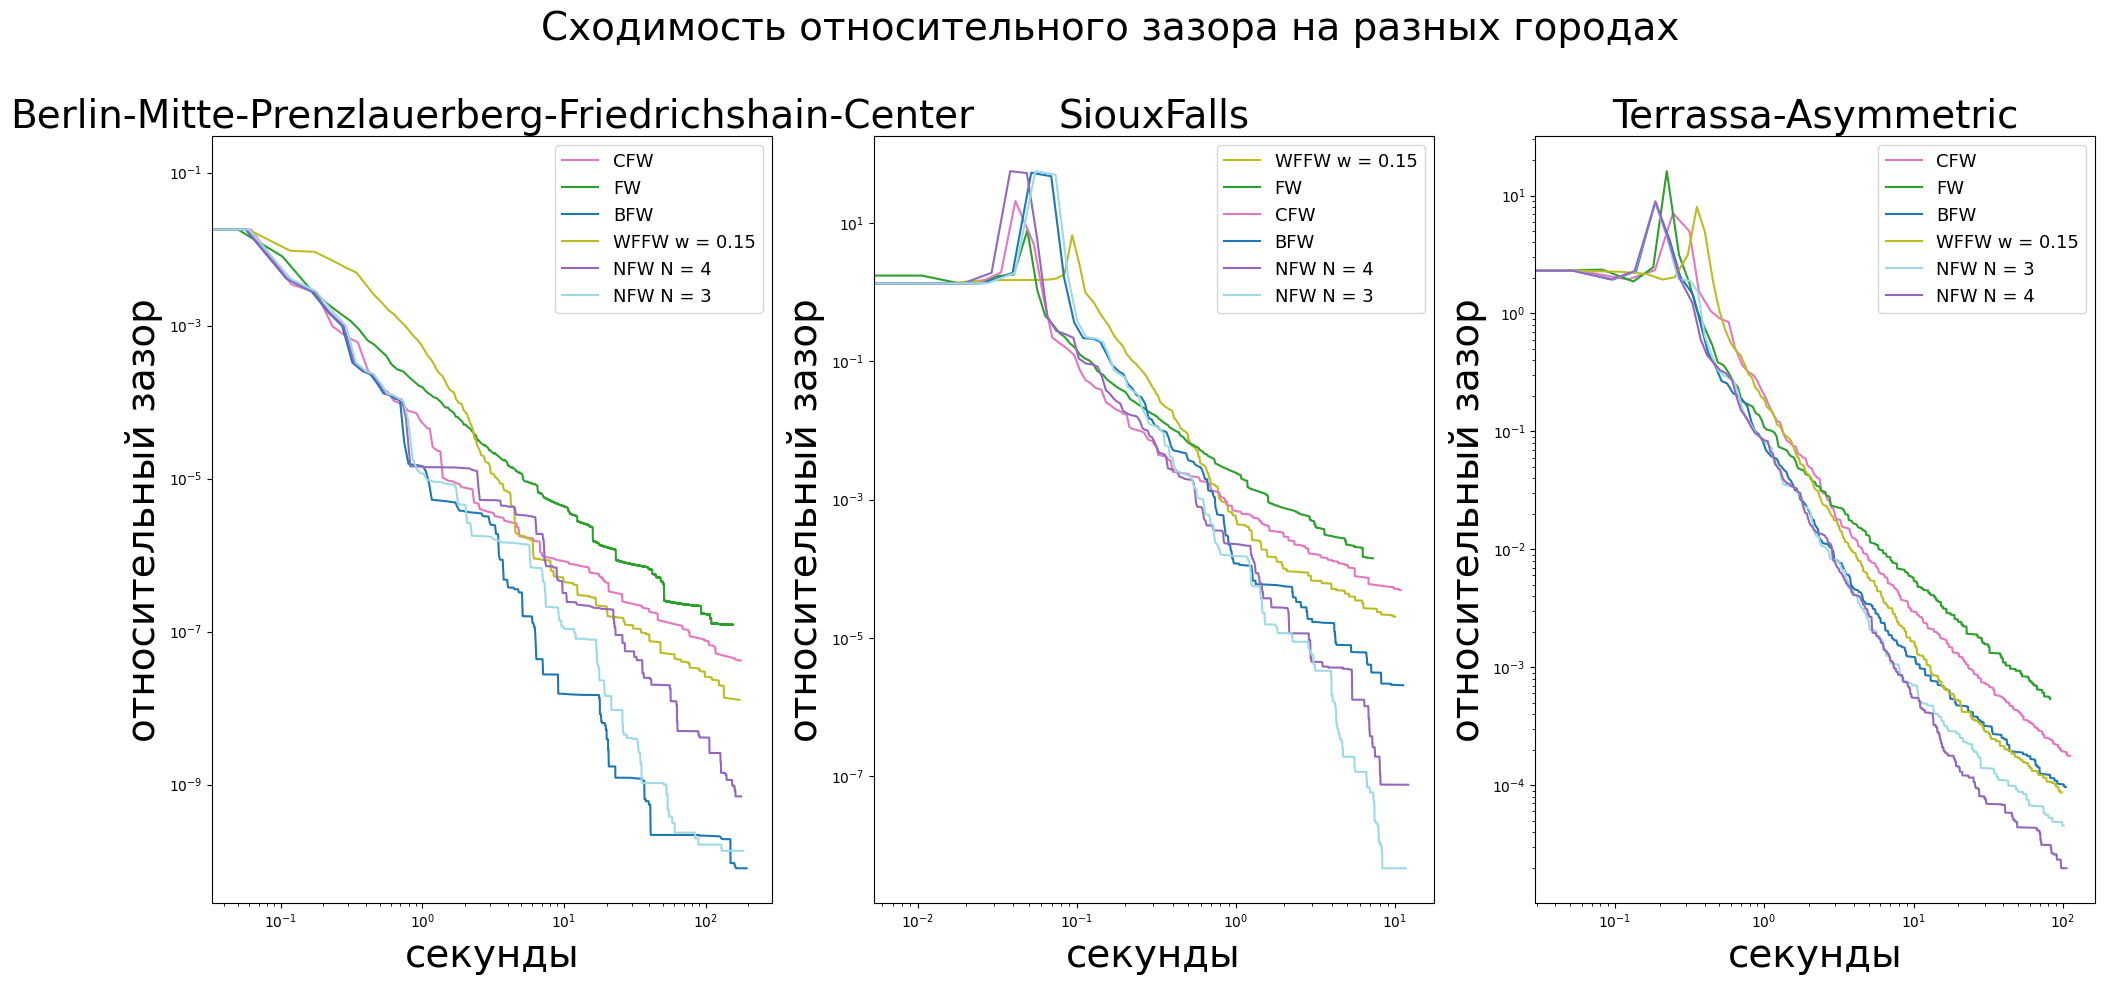

In [27]:
color_generator = plt.cm.get_cmap('tab20', len(keys))
colors = [color_generator(i) for i in np.linspace(0, 1,len(keys))]
# indices = [(0, 0), (0, 1), (0, 2)]
# indices = [(0, 3), (0, 4), (0, 5)]
indices = [(0, 8), (0, 9), (0, 10)]
fig, axs = plt.subplots(1, len(indices), figsize=(20, 10))

fig.suptitle('Сходимость относительного зазора на разных городах', fontsize=28)

for idx, (i, j) in enumerate(indices):
    print(i,j)
    for arr in plots[j] :
        labl = ' '.join(arr[0].split('relative_gap_')[1].split('_')[:-5])
        labl = label_parser(labl)
        if filter_methods(labl , keys) :
            city_name = arr[0].split('_')[-5]
            values = arr[1].T  
            x = values[0]
            y = values[1]
            axs[idx].loglog(x, y , color =colors[dict_keys[labl]] ,label = labl)
    axs[idx].set_xscale('log')
    axs[idx].set_ylabel('относительный зазор', fontsize = 28)
    axs[idx].set_xlabel('секунды' , fontsize = 28)
    axs[idx].set_title(city_name, fontsize=28)
    axs[idx].legend(loc=1, prop={'size': 13})
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.legend()

plt.savefig(f'./experiments_results/for_paper/{indices[0][1]}_CFW.eps' , format='eps')
plt.show()

In [28]:
plots = []
for keys,dataset in datasets.items() :
    mass = []
    # if 'WFW' not in keys and 'NFW' not in keys:
    if 'NFW' in keys:
    # if 'WFW' in keys:
        print(keys)
        for arr in dataset :
            mass.append(arr)
        plots.append(mass)        
keys = [ label_parser(j) for j in  get_names(plots)]
print(keys)
dict_keys = dict([(key ,j) for j , key in enumerate(keys) ])
print(dict_keys)

./experiments_results/for_paper/NFW/Berlin-Friedrichshain
./experiments_results/for_paper/NFW/Anaheim
./experiments_results/for_paper/NFW/SiouxFalls
./experiments_results/for_paper/NFW/Terrassa-Asymmetric
['NFW N = 6', 'NFW N = 3', 'NFW N = 7', 'NFW N = 5', 'NFW N = 9', 'NFW N = 4', 'NFW N = 8', 'BFW']
{'NFW N = 6': 0, 'NFW N = 3': 1, 'NFW N = 7': 2, 'NFW N = 5': 3, 'NFW N = 9': 4, 'NFW N = 4': 5, 'NFW N = 8': 6, 'BFW': 7}


## NFW

/tmp/ipykernel_538037/376358922.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_generator = plt.cm.get_cmap('tab20', len(keys))


0 2
0 3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


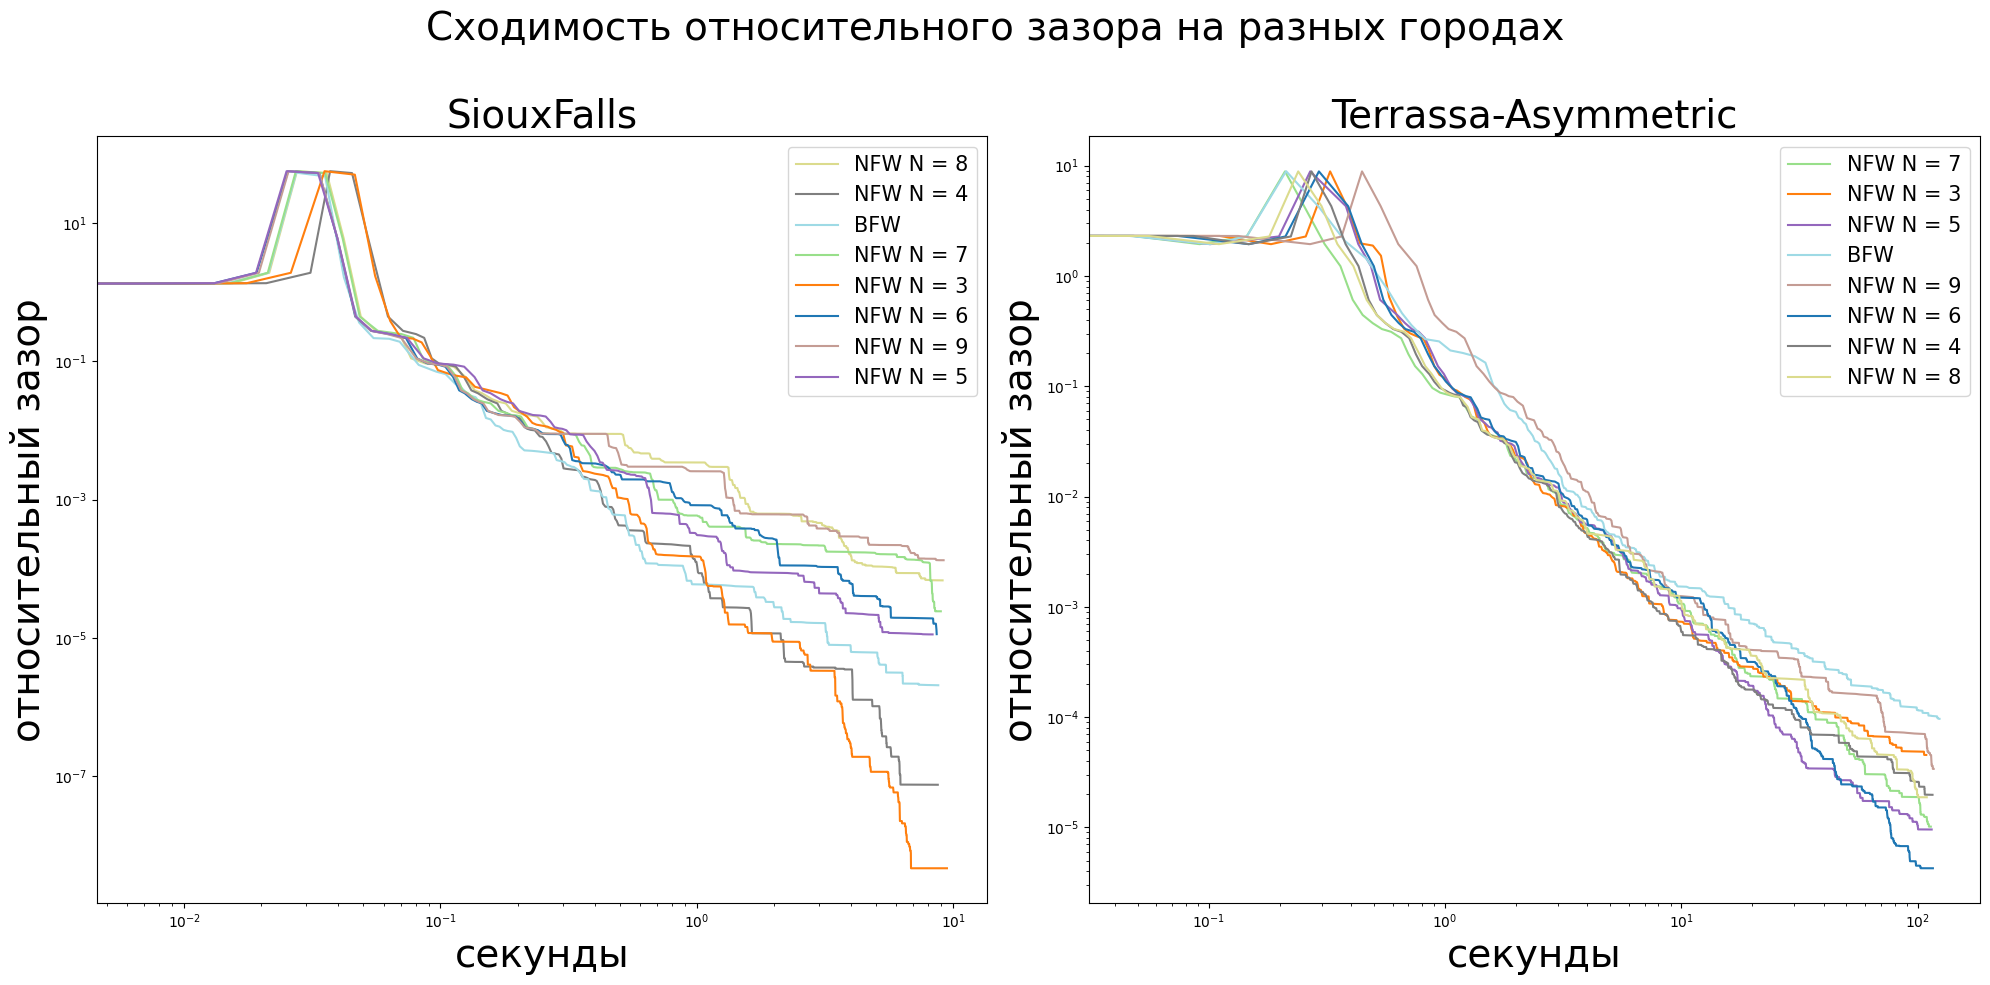

In [30]:
color_generator = plt.cm.get_cmap('tab20', len(keys))
colors = [color_generator(i) for i in np.linspace(0, 1,len(keys))]
# indices = [(0, 0), (0, 1)]
indices = [(0, 2),(0,3)]
fig, axs = plt.subplots(1, len(indices), figsize=(20, 10))

fig.suptitle('Сходимость относительного зазора на разных городах', fontsize=28)

for idx, (i, j) in enumerate(indices):
    print(i,j)
    for col_id , arr in enumerate(plots[j]) :
        labl = ' '.join(arr[0].split('relative_gap_')[1].split('_')[:-5])
        labl = label_parser(labl)
        if filter_methods(labl , keys) :
            city_name = arr[0].split('_')[-5]
            values = arr[1].T  
            x = values[0]
            y = values[1]
            axs[idx].loglog(x, y , color =colors[dict_keys[labl]] ,label = labl)
    axs[idx].set_xscale('log')
    axs[idx].set_ylabel('относительный зазор', fontsize = 28)
    axs[idx].set_xlabel('секунды' , fontsize = 28)
    axs[idx].set_title(city_name, fontsize=28)
    axs[idx].legend(loc=1, prop={'size': 15})
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.legend()

plt.savefig(f'./experiments_results/for_paper/{indices[0][1]}_NFW.eps' , format='eps')
plt.show()

## FWF FWFW

In [31]:
plots = []
for keys,dataset in datasets.items() :
    mass = []
    # if 'WFW' not in keys and 'NFW' not in keys:
    # if 'NFW' in keys:
    if 'WFW_WFW' in keys:
        print(keys)
        for arr in dataset :
            mass.append(arr)
        plots.append(mass)        
keys = [ label_parser(j) for j in  get_names(plots)]
print(keys)
dict_keys = dict([(key ,j) for j , key in enumerate(keys) ])
print(dict_keys)

./experiments_results/for_paper/WFW_WFW_weighted/Berlin-Friedrichshain
./experiments_results/for_paper/WFW_WFW_weighted/Anaheim
./experiments_results/for_paper/WFW_WFW_weighted/SiouxFalls
./experiments_results/for_paper/WFW_WFW_weighted/Terrassa-Asymmetric
['WFFW w = 0.4', 'FFW N = 6', 'WFFW w = 0.1', 'FFW N = 4', 'CFW', 'FFW N = 5', 'WFFW w = 0.15']
{'WFFW w = 0.4': 0, 'FFW N = 6': 1, 'WFFW w = 0.1': 2, 'FFW N = 4': 3, 'CFW': 4, 'FFW N = 5': 5, 'WFFW w = 0.15': 6}


/tmp/ipykernel_538037/1658070772.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_generator = plt.cm.get_cmap('tab20', len(keys))


0 2
0 3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


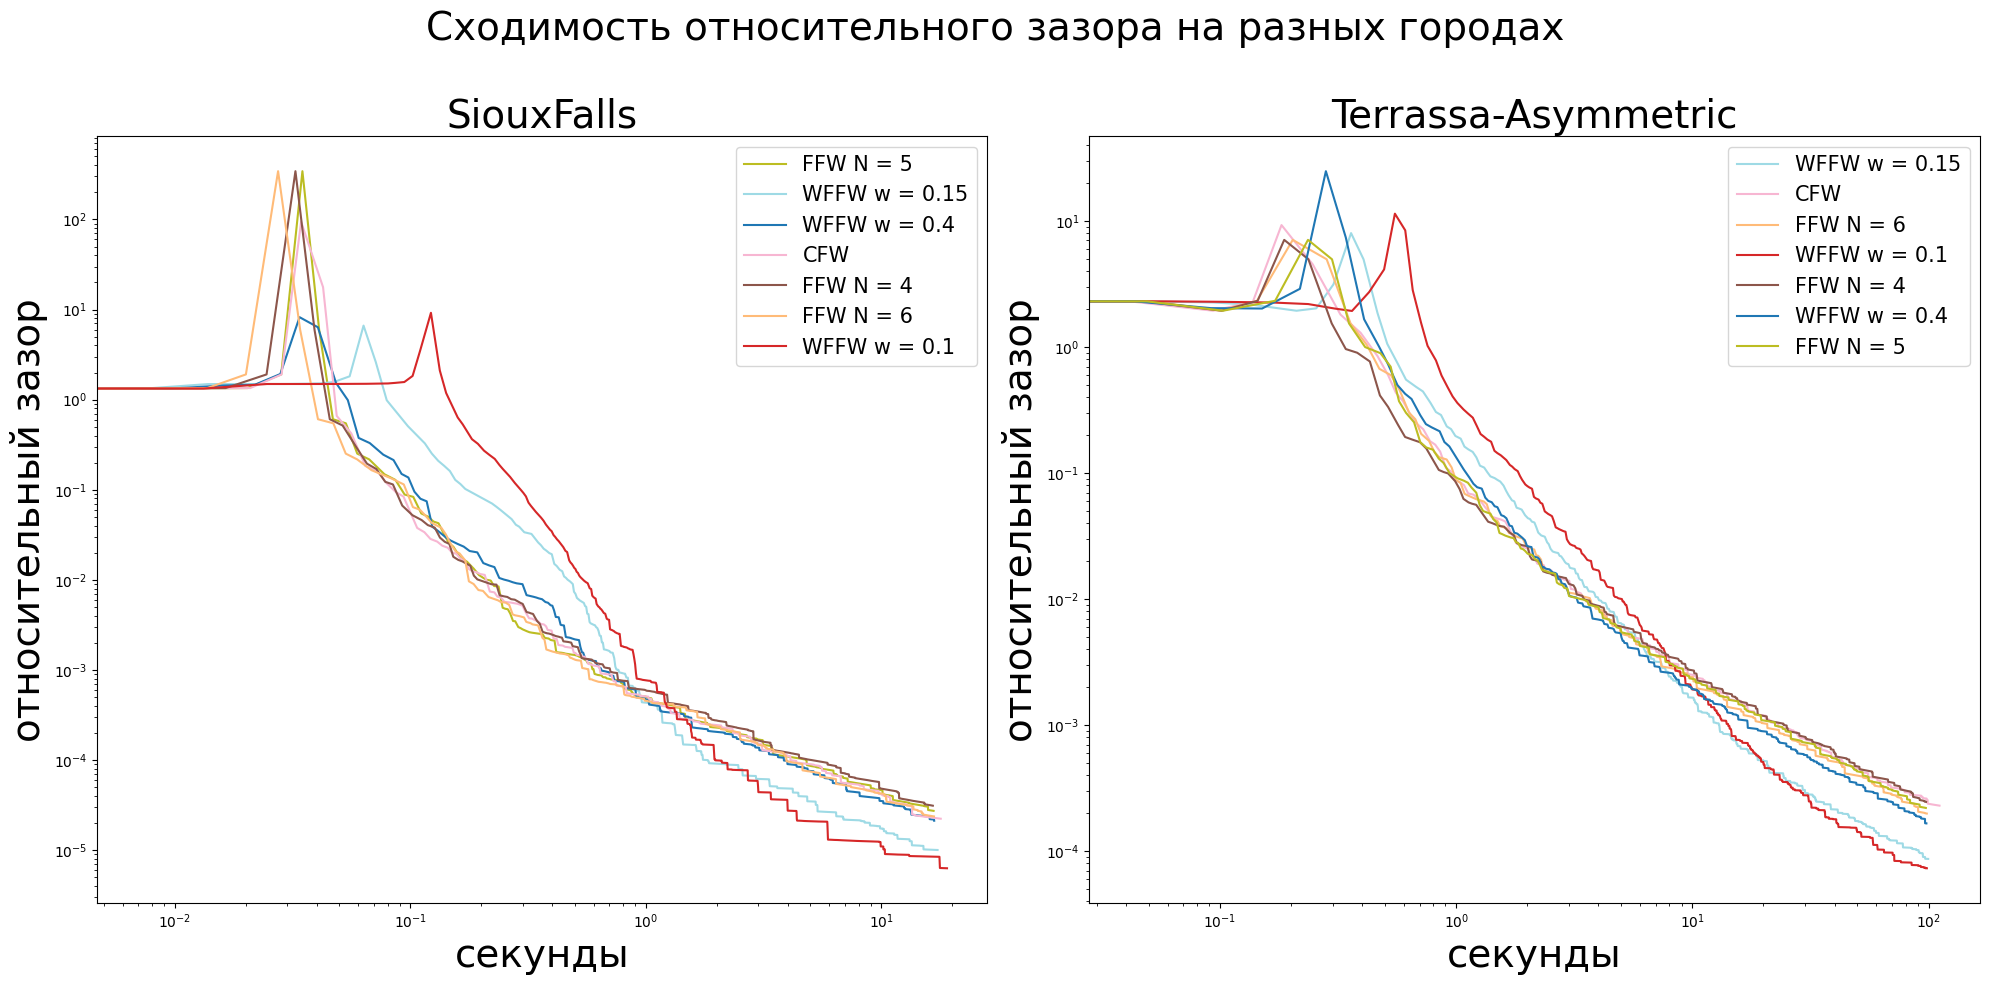

In [33]:
color_generator = plt.cm.get_cmap('tab20', len(keys))
colors = [color_generator(i) for i in np.linspace(0, 1,len(keys))]
# indices = [(0, 0), (0, 1)]
indices = [(0, 2),(0,3)]
fig, axs = plt.subplots(1, len(indices), figsize=(20, 10))

fig.suptitle('Сходимость относительного зазора на разных городах', fontsize=28)

for idx, (i, j) in enumerate(indices):
    print(i,j)
    for col_id , arr in enumerate(plots[j]) :
        labl = ' '.join(arr[0].split('relative_gap_')[1].split('_')[:-5])
        labl = label_parser(labl)
        if filter_methods(labl , keys) :
            city_name = arr[0].split('_')[-5]
            values = arr[1].T  
            x = values[0]
            y = values[1]
            axs[idx].loglog(x, y , color =colors[dict_keys[labl]] ,label = labl)
    axs[idx].set_xscale('log')
    axs[idx].set_ylabel('относительный зазор', fontsize = 28)
    axs[idx].set_xlabel('секунды' , fontsize = 28)
    axs[idx].set_title(city_name, fontsize=28)
    axs[idx].legend(loc=1, prop={'size': 15})
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.legend()

plt.savefig(f'./experiments_results/for_paper/{indices[0][1]}_WFW_weighted.eps' , format='eps')
plt.show()

## CHOOSE FWFW W

In [34]:
plots = []
for keys,dataset in datasets.items() :
    mass = []
    # if 'WFW' not in keys and 'NFW' not in keys:
    # if 'NFW' in keys:
    if 'WFW' in keys and 'WFW_WFW' not in keys:
        print(keys)
        for arr in dataset :
            mass.append(arr)
        plots.append(mass)  
keys = [ label_parser(j) for j in  get_names(plots)]
print(keys)
dict_keys = dict([(key ,j) for j , key in enumerate(keys) ])
print(dict_keys)

./experiments_results/for_paper/WFW/Terrassa-Asymmetric
['WFFW w = 0.4', 'WFFW w = 0.0005', 'WFFW w = 0.001', 'WFFW w = 0.05', 'WFFW w = 0.1', 'WFFW w = 0.8', 'CFW', 'WFFW w = 0.15', 'WFFW w = 0.01']
{'WFFW w = 0.4': 0, 'WFFW w = 0.0005': 1, 'WFFW w = 0.001': 2, 'WFFW w = 0.05': 3, 'WFFW w = 0.1': 4, 'WFFW w = 0.8': 5, 'CFW': 6, 'WFFW w = 0.15': 7, 'WFFW w = 0.01': 8}


/tmp/ipykernel_538037/74398692.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_generator = plt.cm.get_cmap('tab20', len(keys))


0 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


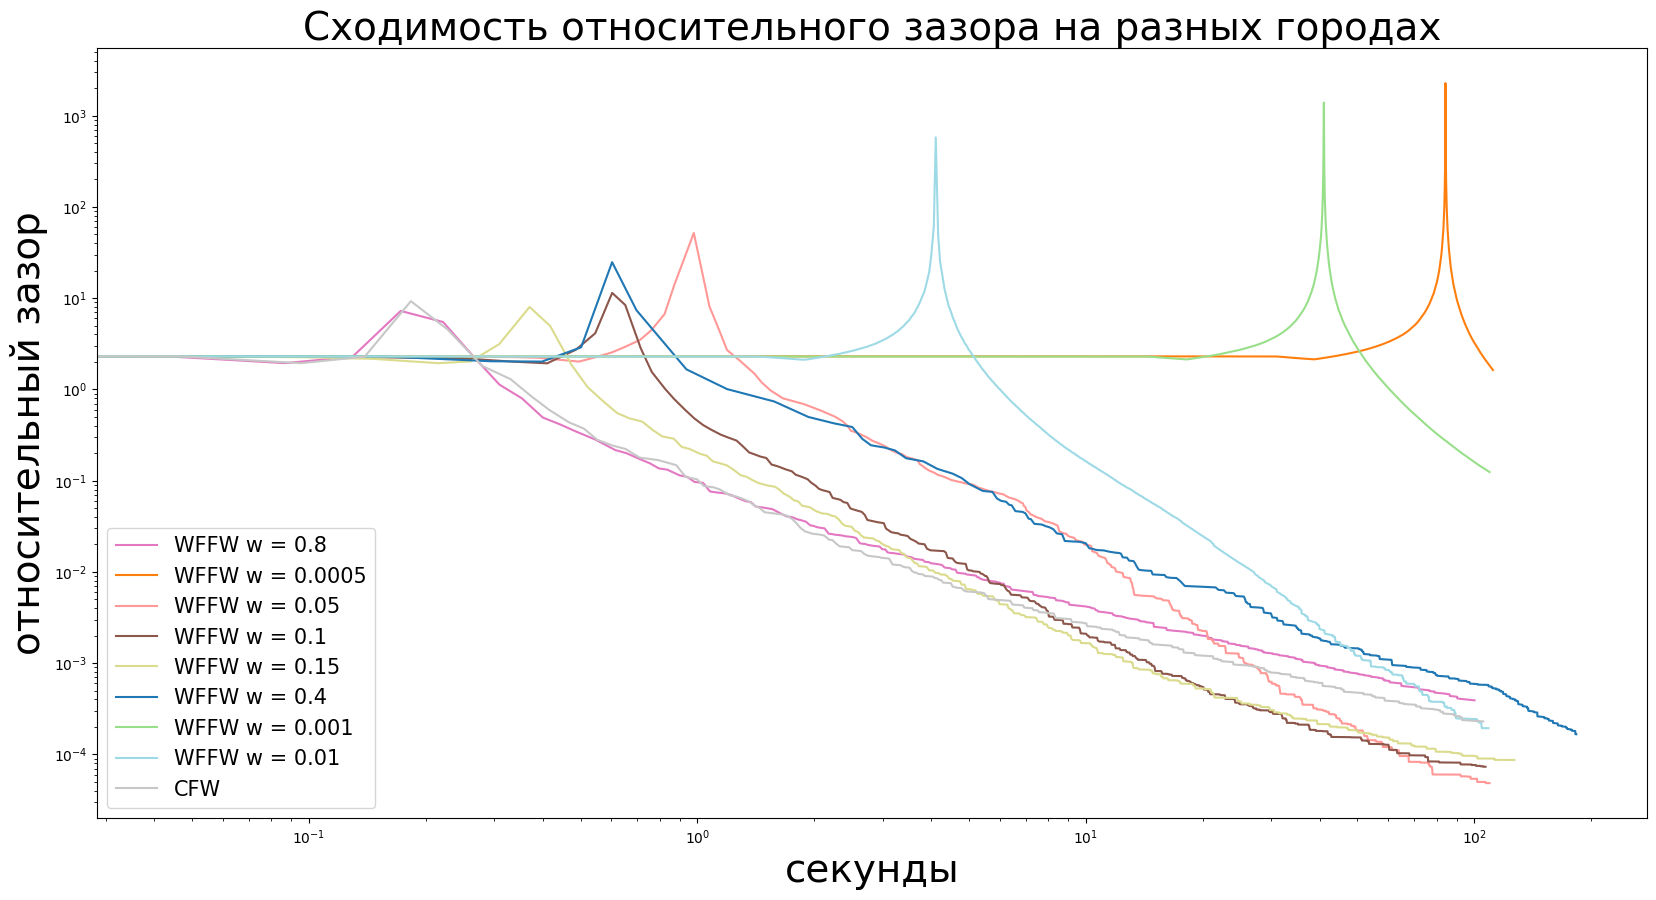

In [35]:
color_generator = plt.cm.get_cmap('tab20', len(keys))
colors = [color_generator(i) for i in np.linspace(0, 1,len(keys))]
indices = [(0, 0)]
# fig, plt = plt.subplots(1, len(indices), figsize=(20, 6))
plt.figure(figsize=(20,10))
for idx, (i, j) in enumerate(indices):
    print(i,j)
    for col_id , arr in enumerate(plots[j]) :
        labl = ' '.join(arr[0].split('relative_gap_')[1].split('_')[:-5])
        labl = label_parser(labl)
        if filter_methods(labl , keys) :
            city_name = arr[0].split('_')[-5]
            values = arr[1].T  
            x = values[0]
            y = values[1]
            plt.loglog(x, y , color =colors[dict_keys[labl]] ,label = labl)
    plt.xscale('log')
    plt.ylabel('относительный зазор', fontsize = 28)
    plt.xlabel('секунды' , fontsize = 28)
    plt.title(city_name, fontsize=28)
    plt.legend(loc=3, prop={'size': 15})
    
plt.title('Сходимость относительного зазора на разных городах', fontsize=28)

plt.savefig(f'./experiments_results/for_paper/{indices[0][1]}_WFW.eps' , format='eps')
plt.show()